# Final Project Overview
by Jedsada Thavornfung

In your final project – time to shine! – you'll use machine learning to predict whether a tumor is benign or malignant. 

NOTE: These data are not the same as the data we used before - those were a toy version and these are the real deal.

The data have a bunch of potential predictor variables and one target variable. The file `FP_breast_cancer_data.csv` is the raw data, with one target variable column coded as **0** or **1**. This is best for machine learning.

The file `FP_breast_cancer_data_catcol.csv` has an additional column I added that codes the target variable as **"benign"** or **"malignant"**. This is easier to use when playing around with, for example, seaborn's pairplot() function.

Your goal is to **_compare 2 machine learning algorithms for classifying tumor type_**. You can use two of the 3 we covered in class, or try one we haven't covered (such as k-means).

| |Algorithm 1|Algorithm 2
|:-:|:-:|:-:|
**2 good variables by eye**	| ? | ?
**Best two components via PCA**	| ? | ?


For each algorithm, try both **_using 2 variables you identify yourself as potentially useful as well as the "best" two variables (principal components) identified by PCA_**. In other words, you'll end up with 4 sets of results as per the table below.

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

---

# Checking Data

## Raw Data ('FP_breast_cancer_data.csv')

In [2]:
# Import Raw Data
raw_data = pd.read_csv('data/FP_breast_cancer_data.csv')
raw_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_category
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,0


In [3]:
raw_data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

## Data with label ('FP_breast_cancer_data_catcol.csv')

In [4]:
# Import catcol
catcol = pd.read_csv('data/FP_breast_cancer_data_catcol.csv')
catcol.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_category
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [5]:
catcol.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [6]:
sns.blend_palette(['#FF6961','#647F9C'])

[(1.0, 0.4117647058823529, 0.3803921568627451),
 (0.8784313725490196, 0.42901960784313725, 0.42666666666666664),
 (0.7568627450980392, 0.4462745098039216, 0.47294117647058825),
 (0.6352941176470588, 0.46352941176470586, 0.5192156862745099),
 (0.5137254901960784, 0.4807843137254902, 0.5654901960784314),
 (0.39215686274509803, 0.4980392156862745, 0.611764705882353)]

Text(0.5, 1.0, 'Correlation Between the Selected Values')

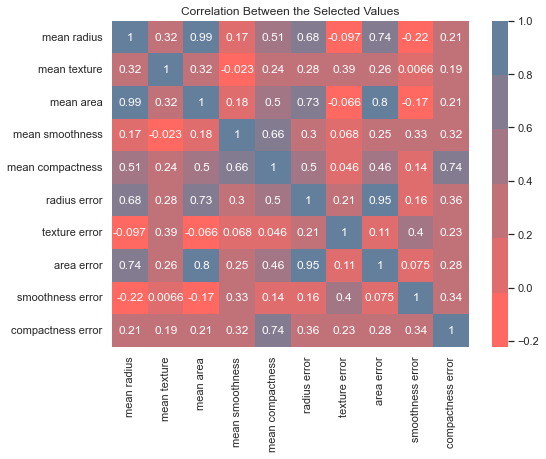

In [7]:
check_data = catcol[['mean radius','mean texture','mean area','mean smoothness','mean compactness',
                    'radius error','texture error','area error','smoothness error','compactness error',
                    'target_category']]

sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(data = check_data.corr(), annot = True,
           cmap = sns.blend_palette(['#FF6961','#647F9C'])).set_title('Correlation Between the Selected Values')

Based on the correlation, I decided to pick the data between `mean area` and `area error` because they have the correaltion of _0.80_ for my first clustering. And, I decided to pick the data between `mean area` and `mean radius` since they have the correlation of _0.99_ for my second clustering. 

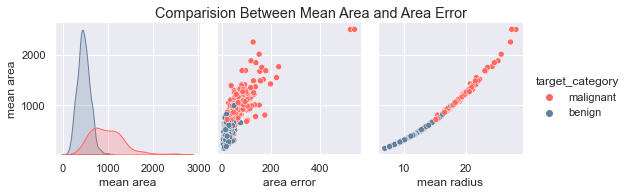

In [8]:
sns.pairplot(data = check_data, 
             x_vars = ['mean area','area error','mean radius'],
             y_vars = ['mean area'],
             hue = 'target_category',
            palette = sns.blend_palette(['#FF6961','#647F9C'],2)).fig.suptitle('Comparision Between Mean Area and Area Error', y = 1.05);

In [9]:
df = catcol[['mean radius','mean area','area error', 'target_category','target']]
df.head()

,mean radius,mean area,area error,target_category,target
0,17.99,1001.0,153.40,malignant,0
1,20.57,1326.0,74.08,malignant,0
2,19.69,1203.0,94.03,malignant,0
3,11.42,386.1,27.23,malignant,0
4,20.29,1297.0,94.44,malignant,0


---

# PCA for All Data

In [10]:
# Create X and y label for PCA
X_pca = np.array(catcol.iloc[:,0:30])
y_pca = np.array(catcol.iloc[:,30])

In [11]:
pca = PCA(n_components=2)

In [12]:
X_PCA = pca.fit_transform(X_pca)

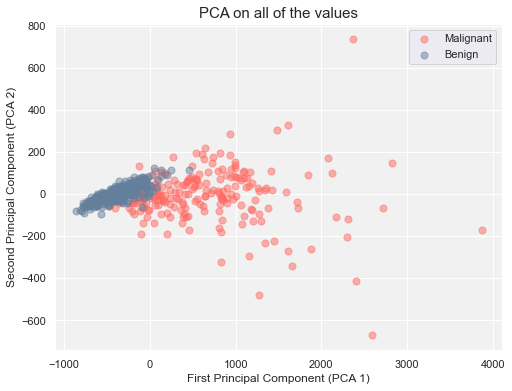

In [13]:
ax = plt.axes()
ax.set_facecolor('#F1F1F1')

# Scatter plot of the first two principal components 
# with color coding for species
colors = ['#FF6961','#647F9C']
category = ['Malignant','Benign']

for i, color, target_name in zip(range(2), colors, category):
    plt.scatter(X_PCA[y_pca == i, 0], X_PCA[y_pca == i, 1], 
                color = color, label = target_name,
               alpha = 0.5, s = 50,
               edgecolors = color)

plt.xlabel('First Principal Component (PCA 1)')
plt.ylabel('Second Principal Component (PCA 2)')
plt.legend(loc = 'best')
plt.title('PCA on all of the values', 
         fontsize = 15)
plt.show()

In [14]:
# Create label for PCA
results_pca = pd.DataFrame(X_PCA, columns = ['PCA1','PCA2'])
results_pca.head()

,PCA1,PCA2
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743
3,-407.180803,-67.380320
4,930.341180,189.340742


---

# KNearest Neighbor (KNN): Mean Area and Area Error

## KNN: Area Error and Mean Area

In [15]:
svm = df[['area error','mean area','target_category','target']]
svm.head()

,area error,mean area,target_category,target
0,153.40,1001.0,malignant,0
1,74.08,1326.0,malignant,0
2,94.03,1203.0,malignant,0
3,27.23,386.1,malignant,0
4,94.44,1297.0,malignant,0


In [16]:
svm.shape

(569, 4)

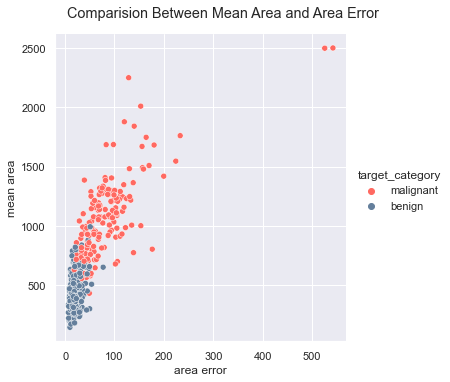

In [17]:
sns.pairplot(data = svm, 
             x_vars = ['area error'],
             y_vars = ['mean area'],
             hue = 'target_category',
            palette = sns.blend_palette(['#FF6961','#647F9C'],2),
            height = 5).fig.suptitle('Comparision Between Mean Area and Area Error', y = 1.05);

In [18]:
# Create X and y label
X_svm = np.array(svm.iloc[:, [0,1]])
y_svm = np.array(svm.iloc[:, 3])

In [19]:
# Split the data into training and test sets (80% training, 20% testing)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [20]:
print('x_train_svm:',X_train_svm.shape)
print('x_test_svm:', X_test_svm.shape)
print('y_train_svm:', y_train_svm.shape)
print('y_test_svm:', y_test_svm.shape)

x_train_svm: (455, 2)
x_test_svm: (114, 2)
y_train_svm: (455,)
y_test_svm: (114,)


In [21]:
# Create the K-Nearest Neighbors classifier with k=3
k = 3
knn_svm = KNeighborsClassifier(n_neighbors=k)

# KNN fit
knn_svm.fit(X_train_svm,y_train_svm)

KNeighborsClassifier(n_neighbors=3)

In [22]:
# Create KNN Predictor
y_pred_svm = knn_svm.predict(X_test_svm)

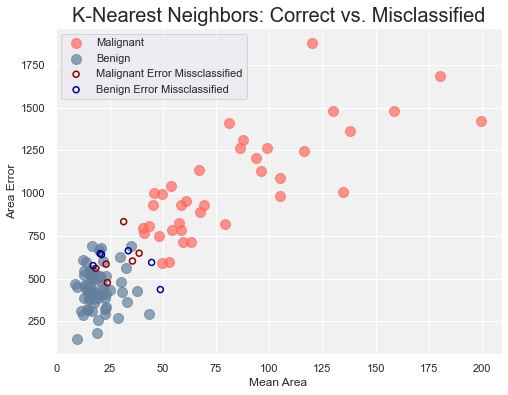

In [23]:
ax = plt.axes()
ax.set_facecolor('#F1F1F1')

# Scatter plot of the classified test data with mistakes as open symbols
colors = ['#FF6961','#647F9C']
category = ['Malignant','Benign']

#labels = ['Correct', 'Misclassified']

for i, color, target_name in zip(range(2), colors, category):
    plt.scatter(X_test_svm[(y_test_svm == y_pred_svm) & (y_test_svm == i), 0], 
                X_test_svm[(y_test_svm == y_pred_svm) & (y_test_svm == i), 1],
                color=color,
                label=target_name, 
                s = 100, 
                alpha = 0.7)
    
    
colors_error = ['#8b0000','#00008B']
category_error = ['Malignant Error Missclassified','Benign Error Missclassified']    
markers = ['o', 'o']  

# Plot the misclassified points as open symbols
for i, color, target_name, marker in zip(range(2), colors_error, category_error, markers):
    plt.scatter(X_test_svm[(y_test_svm != y_pred_svm) & (y_test_svm == i), 0],
                X_test_svm[(y_test_svm != y_pred_svm) & (y_test_svm == i), 1], 
                color = color, marker = marker, facecolors = 'none', 
                linewidths = 1.5, edgecolors = color, 
                label = category_error[i])

plt.xlabel('Mean Area')
plt.ylabel('Area Error')
plt.legend(loc="best")
plt.title('K-Nearest Neighbors: Correct vs. Misclassified', 
         fontsize = 20)
plt.show()

In [24]:
# Check Accuracy
cls_report_svm = classification_report(y_test_svm, y_pred_svm)
print(cls_report_svm)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        43
           1       0.92      0.92      0.92        71

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



In [25]:
# Calculate and print the accuracy
acc_score_svm = accuracy_score(y_test_svm, y_pred_svm) 
print(f"Accuracy Score for KNN: {acc_score_svm * 100:.2f}%")

Accuracy Score for KNN: 89.47%


## KNN: PCA 1 and PCA 2

In [26]:
results_pca['target_category'] = df[['target_category']]
results_pca['target'] = df[['target']]
results_pca.head()

,PCA1,PCA2,target_category,target
0,1160.142574,-293.917544,malignant,0
1,1269.122443,15.630182,malignant,0
2,995.793889,39.156743,malignant,0
3,-407.180803,-67.380320,malignant,0
4,930.341180,189.340742,malignant,0


In [27]:
# Create X and Y using PCA value
knn_x = np.array(results_pca.iloc[:,[0,1]])
knn_y = np.array(results_pca.iloc[:,3])

In [28]:
# Split the data into training and test sets (80% training, 20% testing)
X_train_knn_pca, X_test_knn_pca, y_train_knn_pca, y_test_knn_pca = train_test_split(knn_x, knn_y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [29]:
print('X_train_knn_pca:',X_train_knn_pca.shape)
print('X_test_knn_pca:', X_test_knn_pca.shape)
print('y_train_knn_pca:', y_train_knn_pca.shape)
print('y_test_knn_pca:', y_test_knn_pca.shape)

X_train_knn_pca: (455, 2)
X_test_knn_pca: (114, 2)
y_train_knn_pca: (455,)
y_test_knn_pca: (114,)


In [60]:
# Create the K-Nearest Neighbors classifier with k=3
k = 3
knn_pca = KNeighborsClassifier(n_neighbors=k)

# KNN fit
knn_pca.fit(X_train_knn_pca,y_train_knn_pca)

KNeighborsClassifier(n_neighbors=3)

In [61]:
# Create KNN Predictor
y_pred_knn_pca = knn_svm.predict(X_test_knn_pca)

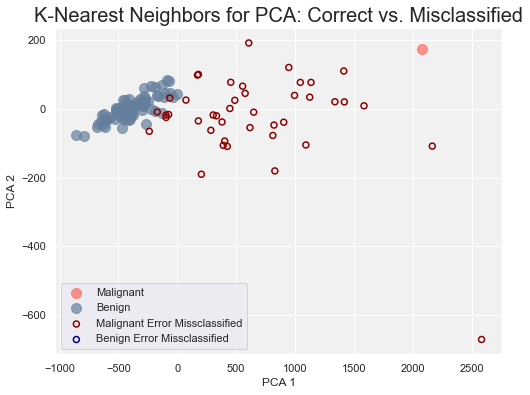

In [62]:
ax = plt.axes()
ax.set_facecolor('#F1F1F1')

# Scatter plot of the classified test data with mistakes as open symbols
colors = ['#FF6961','#647F9C']
category = ['Malignant','Benign']

#labels = ['Correct', 'Misclassified']

for i, color, target_name in zip(range(2), colors, category):
    plt.scatter(X_test_knn_pca[(y_test_knn_pca == y_pred_knn_pca) & (y_test_knn_pca == i), 0], 
                X_test_knn_pca[(y_test_knn_pca == y_pred_knn_pca) & (y_test_knn_pca == i), 1],
                color=color,
                label=target_name, 
                s = 100, 
                alpha = 0.7)
    
colors_error = ['#8b0000','#00008B']
category_error = ['Malignant Error Missclassified','Benign Error Missclassified']    
markers = ['o', 'o']  

# Plot the misclassified points as open symbols
for i, color, target_name, marker in zip(range(2), colors_error, category_error, markers):
    plt.scatter(X_test_knn_pca[(y_test_knn_pca != y_pred_knn_pca) & (y_test_knn_pca == i), 0],
                X_test_knn_pca[(y_test_knn_pca != y_pred_knn_pca) & (y_test_knn_pca == i), 1], 
                color = color, marker = marker, facecolors = 'none', 
                linewidths = 1.5, edgecolors = color, 
                label = category_error[i])
    
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc="best")
plt.title('K-Nearest Neighbors for PCA: Correct vs. Misclassified', 
         fontsize = 20)
plt.show()

In [63]:
# Check Accuracy
cls_report_knn_pca = classification_report(y_test_knn_pca, y_pred_knn_pca)
print(cls_report_knn_pca)

              precision    recall  f1-score   support

           0       1.00      0.02      0.05        43
           1       0.63      1.00      0.77        71

    accuracy                           0.63       114
   macro avg       0.81      0.51      0.41       114
weighted avg       0.77      0.63      0.50       114



In [34]:
# Calculate and print the accuracy
acc_score_knn_pca = accuracy_score(y_test_knn_pca, y_pred_knn_pca) 
print(f"Accuracy Score for KNN from PCA: {acc_score_knn_pca * 100:.2f}%")

Accuracy Score for KNN from PCA: 63.16%


---

# Gaussian Naive Bayes: Mean Area and Area Error

## Gaussian Naive Bayes

In [35]:
gnb = df[['area error','mean area','target_category','target']]
gnb.head()

,area error,mean area,target_category,target
0,153.40,1001.0,malignant,0
1,74.08,1326.0,malignant,0
2,94.03,1203.0,malignant,0
3,27.23,386.1,malignant,0
4,94.44,1297.0,malignant,0


In [36]:
gnb.shape

(569, 4)

In [37]:
# Create X and y label
X_gnb = np.array(gnb.iloc[:, [0,1]])
y_gnb = np.array(gnb.iloc[:, 3])

In [38]:
# Split the data into training and test sets (80% training, 20% testing)
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X_gnb, y_gnb, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [39]:
print('x_train_gnb:',X_train_gnb.shape)
print('x_test_gnb:', X_test_gnb.shape)
print('y_train_gnb:', y_train_gnb.shape)
print('y_test_gnb:', y_test_gnb.shape)

x_train_gnb: (455, 2)
x_test_gnb: (114, 2)
y_train_gnb: (455,)
y_test_gnb: (114,)


In [40]:
# Create a Naive Bayes classifier
gnb = GaussianNB()

In [41]:
# and train it on the PCA-transformed training data
gnb.fit(X_train_gnb,y_train_gnb)

GaussianNB()

In [42]:
# Make predictions on the PCA-transformed testing data
y_pred_gnb = gnb.predict(X_test_gnb)

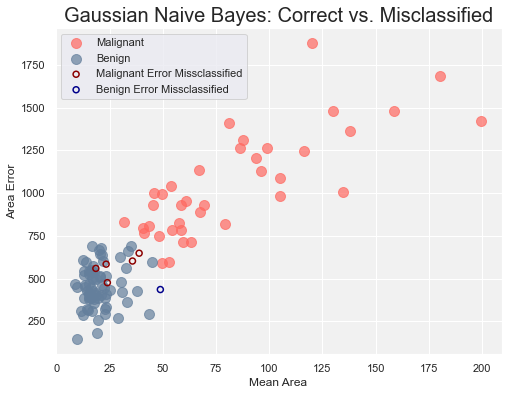

In [43]:
ax = plt.axes()
ax.set_facecolor('#F1F1F1')

# Scatter plot of the classified test data with mistakes as open symbols
colors = ['#FF6961','#647F9C']
category = ['Malignant','Benign']

#labels = ['Correct', 'Misclassified']

for i, color, target_name in zip(range(2), colors, category):
    plt.scatter(X_test_gnb[(y_test_gnb == y_pred_gnb) & (y_test_gnb == i), 0], 
                X_test_gnb[(y_test_gnb == y_pred_gnb) & (y_test_gnb == i), 1],
                color=color,
                label=target_name, 
                s = 100, 
                alpha = 0.7)
    
    
colors_error = ['#8b0000','#00008B']
category_error = ['Malignant Error Missclassified','Benign Error Missclassified']    
markers = ['o', 'o']  

# Plot the misclassified points as open symbols
for i, color, target_name, marker in zip(range(2), colors_error, category_error, markers):
    plt.scatter(X_test_gnb[(y_test_gnb != y_pred_gnb) & (y_test_gnb == i), 0],
                X_test_gnb[(y_test_gnb != y_pred_gnb) & (y_test_gnb == i), 1], 
                color = color, marker = marker, facecolors = 'none', 
                linewidths = 1.5, edgecolors = color, 
                label = category_error[i])

plt.xlabel('Mean Area')
plt.ylabel('Area Error')
plt.legend(loc="best")
plt.title('Gaussian Naive Bayes: Correct vs. Misclassified', 
         fontsize = 20)
plt.show()

In [44]:
# Check Accuracy
cls_report_gnb = classification_report(y_test_gnb, y_pred_gnb)
print(cls_report_gnb)

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [45]:
# Calculate and print the accuracy
acc_score_gnb = accuracy_score(y_test_gnb, y_pred_gnb) 
print(f"Accuracy Score for Gaussian Naive Bayes: {acc_score_gnb * 100:.2f}%")

Accuracy Score for Gaussian Naive Bayes: 94.74%


## Gaussian Naive Bayes: PCA 1 and PCA 2

In [46]:
# Create X and Y using PCA value
gnv_x = np.array(results_pca.iloc[:,[0,1]])
gnv_y = np.array(results_pca.iloc[:,3])

In [47]:
# Split the data into training and test sets (80% training, 20% testing)
X_train_gnv_pca, X_test_gnv_pca, y_train_gnv_pca, y_test_gnv_pca = train_test_split(gnv_x, gnv_y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [48]:
print('X_train_gnv_pca:',X_train_gnv_pca.shape)
print('X_test_gnv_pca:', X_test_gnv_pca.shape)
print('y_train_gnv_pca:', y_train_gnv_pca.shape)
print('y_test_gnv_pca:', y_test_gnv_pca.shape)

X_train_gnv_pca: (455, 2)
X_test_gnv_pca: (114, 2)
y_train_gnv_pca: (455,)
y_test_gnv_pca: (114,)


In [49]:
# Create a Naive Bayes classifier
gnb = GaussianNB()

In [50]:
# and train it on the PCA-transformed training data
gnb.fit(X_train_gnv_pca,y_train_gnv_pca)

GaussianNB()

In [51]:
# Make predictions on the PCA-transformed testing data
y_pred_gnv_pca = gnb.predict(X_test_gnv_pca)

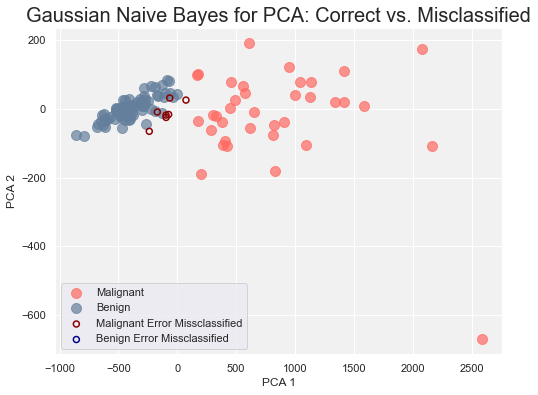

In [52]:
ax = plt.axes()
ax.set_facecolor('#F1F1F1')

# Scatter plot of the classified test data with mistakes as open symbols
colors = ['#FF6961','#647F9C']
category = ['Malignant','Benign']

#labels = ['Correct', 'Misclassified']

for i, color, target_name in zip(range(2), colors, category):
    plt.scatter(X_test_gnv_pca[(y_test_gnv_pca == y_pred_gnv_pca) & (y_test_gnv_pca == i), 0], 
                X_test_gnv_pca[(y_test_gnv_pca == y_pred_gnv_pca) & (y_test_gnv_pca == i), 1],
                color=color,
                label=target_name, 
                s = 100, 
                alpha = 0.7)
    
colors_error = ['#8b0000','#00008B']
category_error = ['Malignant Error Missclassified','Benign Error Missclassified']    
markers = ['o', 'o']  

# Plot the misclassified points as open symbols
for i, color, target_name, marker in zip(range(2), colors_error, category_error, markers):
    plt.scatter(X_test_gnv_pca[(y_test_gnv_pca != y_pred_gnv_pca) & (y_test_gnv_pca == i), 0],
                X_test_gnv_pca[(y_test_gnv_pca != y_pred_gnv_pca) & (y_test_gnv_pca == i), 1], 
                color = color, marker = marker, facecolors = 'none', 
                linewidths = 1.5, edgecolors = color, 
                label = category_error[i])
    
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc="best")
plt.title('Gaussian Naive Bayes for PCA: Correct vs. Misclassified', 
         fontsize = 20)
plt.show()

In [53]:
# Check Accuracy
cls_report_gnv_pca = classification_report(y_test_gnv_pca, y_pred_gnv_pca)
print(cls_report_gnv_pca)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        43
           1       0.91      1.00      0.95        71

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [54]:
# Calculate and print the accuracy
acc_score_gnv_pca = accuracy_score(y_test_gnv_pca, y_pred_gnv_pca) 
print(f"Accuracy Score for Gaussian Naive Bayes: {acc_score_gnv_pca * 100:.2f}%")

Accuracy Score for Gaussian Naive Bayes: 93.86%


---

# Overall Result

| |Algorithm 1|Algorithm 2
|:-:|:-:|:-:|
**2 good variables by eye** <br /> (_Mean Area_ x _Area Error_)	| _K-Nearest Neighbors_ <br /> 89.47% Accuracy | _Gaussian Naive Bayes_ <br /> 94.74% Accuracy
**Best two components via PCA**	| 63.16% Accuracy| 93.86% Accuracy